In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import os
import obspy
from obspy.core.utcdatetime import UTCDateTime
import matplotlib.pyplot as plt
import netCDF4 as nc
from pyproj import Geod

In [113]:
file = './ST2_C0_01_STR1_TSEN_P1s_v03b.nc'
file = './ST2_C1_04_STR2_TSEN_P1s_v01.nc'
file = './ST2_C1_03_TTL4_TSEN_P1s_v01.nc'
file = './ST2_C1_01_TTL5_TSEN_P1s_v01.nc'
file = './ST2_C1_16_TTL5_TSEN_P1s_v01.nc'
#file = './ST2_C1_17_TTL3_TSEN_P1s_v01.nc'
dataset = nc.Dataset(file)
file = file.replace('P1s_', '')
dataset_location = nc.Dataset(file)

In [114]:
dataset_location.variables['time'][1]-dataset_location.variables['time'][0]

/staff/quentin/miniconda2/envs/seismonpy/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


30.0

In [115]:
time_pressure = dataset.variables['time'][:].filled()
pressure = dataset.variables['pressure'][:].filled()

/staff/quentin/miniconda2/envs/seismonpy/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/staff/quentin/miniconda2/envs/seismonpy/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
plt.figure()
plt.plot(time_pressure, pressure)

In [116]:
lon, lat, alt, time = dataset_location['lon'][:].filled(), dataset_location['lat'][:].filled(), dataset_location['alt'][:].filled(), dataset_location['time'][:].filled()

/staff/quentin/miniconda2/envs/seismonpy/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
plt.figure()
#plt.scatter(lon, lat, c=alt/1e3, vmin=18.)
plt.scatter(lon, lat, c=time, vmin=18.)
plt.colorbar()

In [136]:
esrange = -36.81721904815586, -73.04232015965302
esrange_startdate = UTCDateTime('2016-05-27')
esrange_enddate = UTCDateTime('2016-05-28T10:00:00')
from obspy.clients.fdsn import Client
client = Client("IRIS")
offset = 20.5
offset_time = 1000.
opt_catalog = dict(
    starttime = esrange_startdate-offset_time,
    endtime = esrange_enddate-offset_time,
    maxlongitude = min(esrange[1]+offset, 180.),
    maxlatitude = min(esrange[0]+offset, 90.),
    minlongitude = max(esrange[1]-offset, -180.),
    minlatitude = max(esrange[0]-offset, -90.),
    minmagnitude=4., 
    maxdepth=100.,
)
print(opt_catalog)
    
catalog = client.get_events(**opt_catalog)
print(catalog)

{'starttime': UTCDateTime(2016, 5, 26, 23, 43, 20), 'endtime': UTCDateTime(2016, 5, 28, 9, 43, 20), 'maxlongitude': -52.542320159653016, 'maxlatitude': -16.317219048155863, 'minlongitude': -93.54232015965302, 'minlatitude': -57.31721904815586, 'minmagnitude': 4.0, 'maxdepth': 100.0}
2 Event(s) in Catalog:
2016-05-28T03:30:00.000000Z | -37.509,  -74.056 | 4.0  mb
2016-05-27T17:48:34.470000Z | -31.092,  -71.695 | 4.0  mb


In [117]:
from obspy.clients.fdsn import Client
client = Client("IRIS")
offset = 7.5
offset_time = 1000.
opt_catalog = dict(
    starttime = UTCDateTime(dataset_location.date_start)-offset_time,
    endtime = UTCDateTime(dataset_location.date_end)-offset_time,
    maxlongitude = min(np.nanmax(lon)+offset, 180.),
    maxlatitude = min(np.nanmax(lat)+offset, 90.),
    minlongitude = max(np.nanmin(lon)-offset, -180.),
    minlatitude = max(np.nanmin(lat)-offset, -90.),
    minmagnitude=4.5, 
    maxdepth=100.,
)
print(opt_catalog)
    
catalog = client.get_events(**opt_catalog)
print(catalog)

{'starttime': UTCDateTime(2021, 11, 22, 20, 29, 28), 'endtime': UTCDateTime(2021, 12, 19, 7, 14, 28), 'maxlongitude': 129.13306166666666, 'maxlatitude': 18.172863333333332, 'minlongitude': 47.977048333333336, 'minlatitude': -12.17632, 'minmagnitude': 4.5, 'maxdepth': 100.0}
84 Event(s) in Catalog:
2021-12-19T06:27:09.279000Z | +15.471, +120.019 | 4.6  mb
2021-12-19T03:19:46.112000Z | +13.724,  +92.744 | 5.1  Mww
...
2021-11-23T04:23:48.311000Z |  +3.615, +126.951 | 4.6  mb
2021-11-22T21:13:53.506000Z |  +0.373,  +96.633 | 4.8  Mww
To see all events call 'print(CatalogObject.__str__(print_all=True))'


<IPython.core.display.Javascript object>


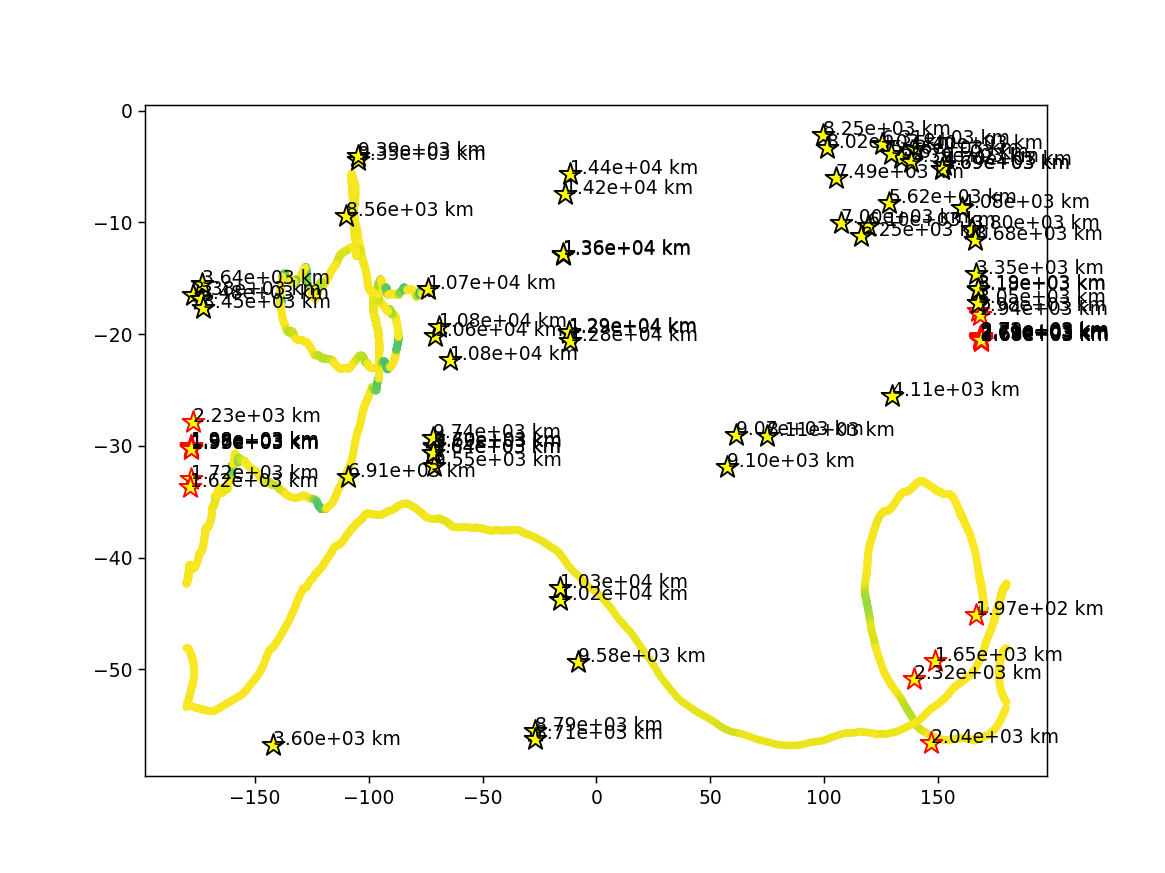

100%|██████████| 80/80 [00:02<00:00, 27.20it/s]


In [174]:
from tqdm import tqdm

def compute_estimated_arrival_time(starttime, time, lon, lat, alt, event, vel_seismic=[4., 8.], vel_is=[0.33, 0.37]):
    
    wgs84_geod = Geod(ellps='WGS84')
    time_source = event.origins[0].time
    offset_time = starttime-time[0]
    time_source_rel = time_source - offset_time
    #time_source_rel_end = (starttime+np.nanmax(time))
    #print(time_source_rel_end, time_source, starttime)
    depth_source = event.origins[0].depth/1e3
    lat_source, lon_source = event.origins[0].latitude, event.origins[0].longitude
    LAT_SOURCE, LON_SOURCE = np.repeat([lat_source], lon.size), np.repeat([lon_source], lon.size)
    _, _, dists = wgs84_geod.inv(LON_SOURCE, LAT_SOURCE, lon, lat)
    dists /= 1e3
    
    full_seismic_distance = np.sqrt((depth_source)**2+(dists)**2)
    time_seismic = [full_seismic_distance/vel_seismic[0], full_seismic_distance/vel_seismic[1]]
    time_acoustic = [(1./vel_is[0])*alt/1e3, (1./vel_is[1])*alt/1e3]
    
    #print(time_source_rel, time_source, offset_time)
    #print(time_seismic[0]+time_acoustic[0])
    #print(time-time_source_rel)
    range_times = [(time-time_source_rel)-(time_seismic[0]+time_acoustic[0]), (time-time_source_rel)-(time_seismic[1]+time_acoustic[1])]
    #imin = np.argmin(abs(time-time_source_rel-range_times[1]))
    #imax = np.argmin(abs(time-time_source_rel-range_times[0]))
    
    ids = np.nanargmin(abs(range_times[0])), np.nanargmin(abs(range_times[1]))
    
    return ids, lat_source, lon_source, dists
    
threshold_distance = 3e3
s_balloon = 10.
plt.figure()
plt.scatter(lon, lat, c=alt, s=s_balloon)

keep_events = {}
for ievent, event in tqdm(enumerate(catalog), total=len(catalog)):
    ids, lat_source, lon_source, dists = compute_estimated_arrival_time(UTCDateTime(dataset_location.date_start), time, lon, lat, alt, event)
    
    if (dists[ids[0]] <= threshold_distance) or (dists[ids[1]] <= threshold_distance):
        keep_events[ievent] = ids
        plt.scatter(lon[ids[1]:ids[0]], lat[ids[1]:ids[0]], facecolors='none', edgecolors='red', s=s_balloon)
        plt.scatter(lon_source, lat_source, marker='*', s=150., color='yellow', edgecolor='red')
    
    else:
        plt.scatter(lon[ids[1]:ids[0]], lat[ids[1]:ids[0]], facecolors='none', edgecolors='black', s=s_balloon)
        plt.scatter(lon_source, lat_source, marker='*', s=150., color='yellow', edgecolor='black')
    
    plt.text(lon_source, lat_source, f'{dists[ids[0]]:.2e} km', ha='left',)

/staff/quentin/miniconda2/envs/seismonpy/lib/python3.7/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (0.5) of bandpass is at or above Nyquist (0.5). Applying a high-pass instead.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


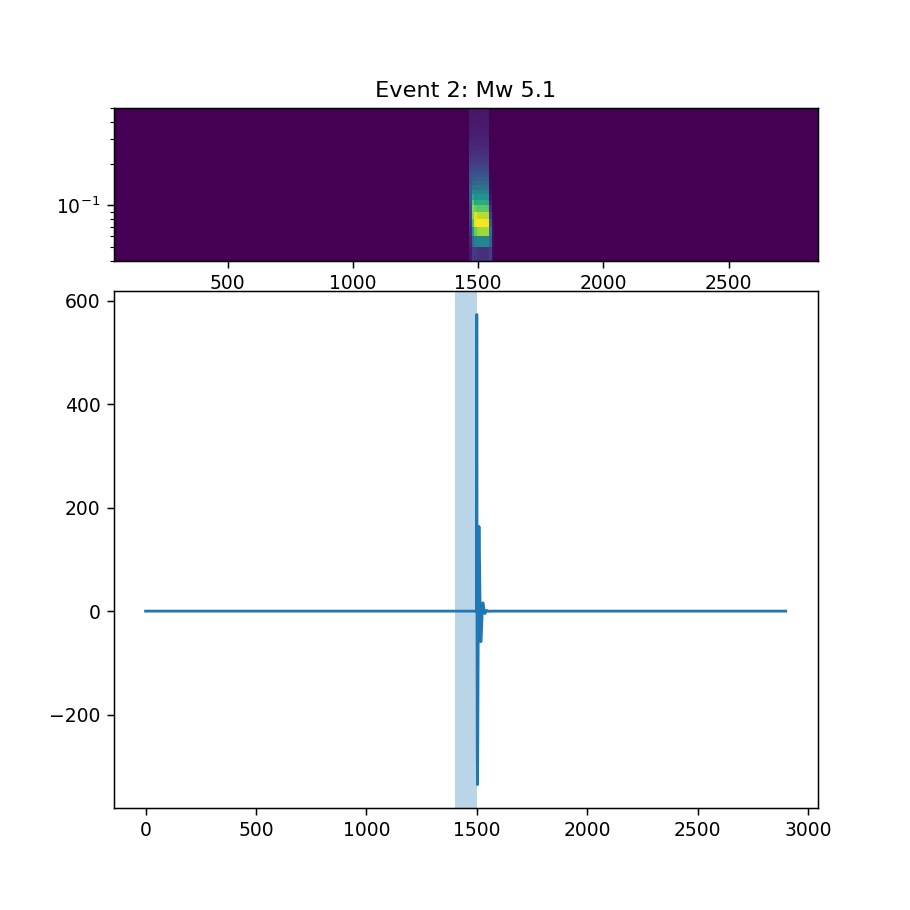

/staff/quentin/miniconda2/envs/seismonpy/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/staff/quentin/miniconda2/envs/seismonpy/lib/python3.7/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (0.5) of bandpass is at or above Nyquist (0.5). Applying a high-pass instead.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


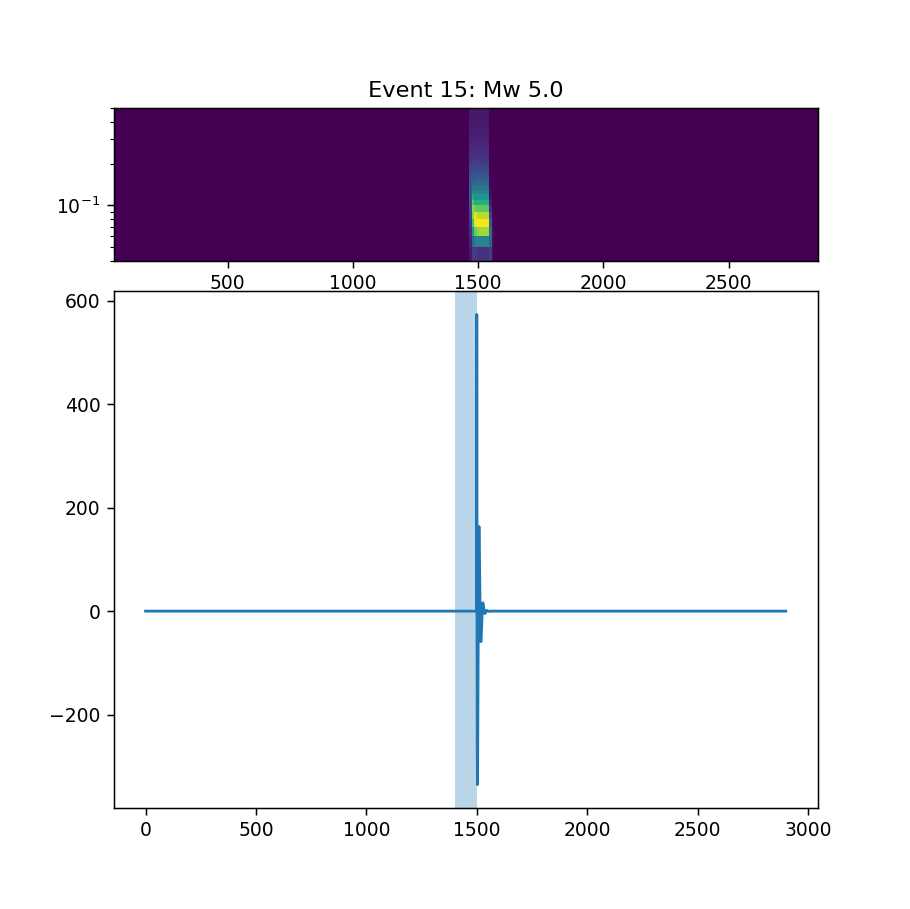

/staff/quentin/miniconda2/envs/seismonpy/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/staff/quentin/miniconda2/envs/seismonpy/lib/python3.7/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (0.5) of bandpass is at or above Nyquist (0.5). Applying a high-pass instead.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


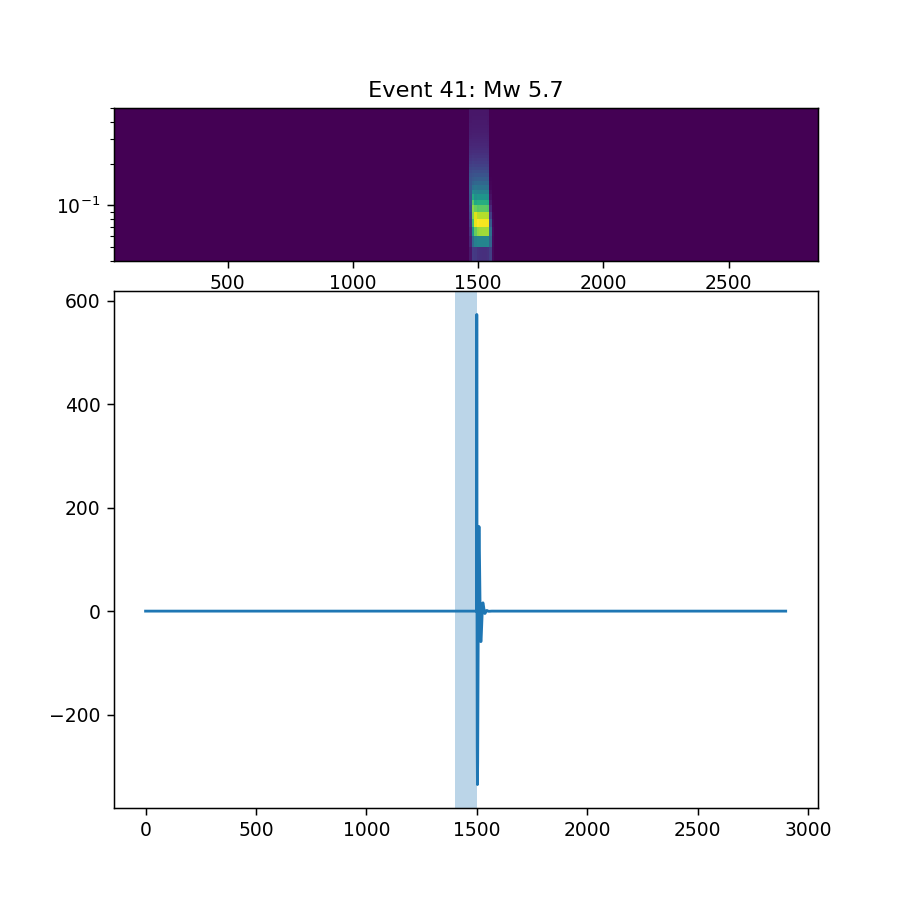

/staff/quentin/miniconda2/envs/seismonpy/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/staff/quentin/miniconda2/envs/seismonpy/lib/python3.7/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (0.5) of bandpass is at or above Nyquist (0.5). Applying a high-pass instead.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


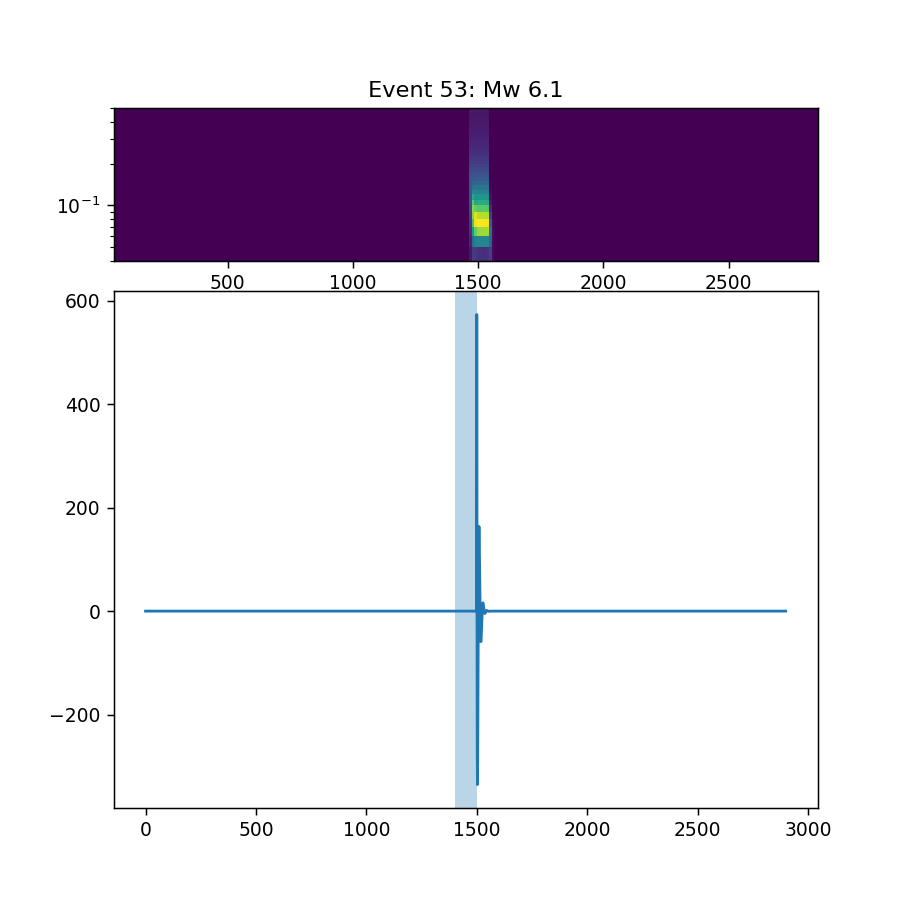

/staff/quentin/miniconda2/envs/seismonpy/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/staff/quentin/miniconda2/envs/seismonpy/lib/python3.7/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (0.5) of bandpass is at or above Nyquist (0.5). Applying a high-pass instead.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


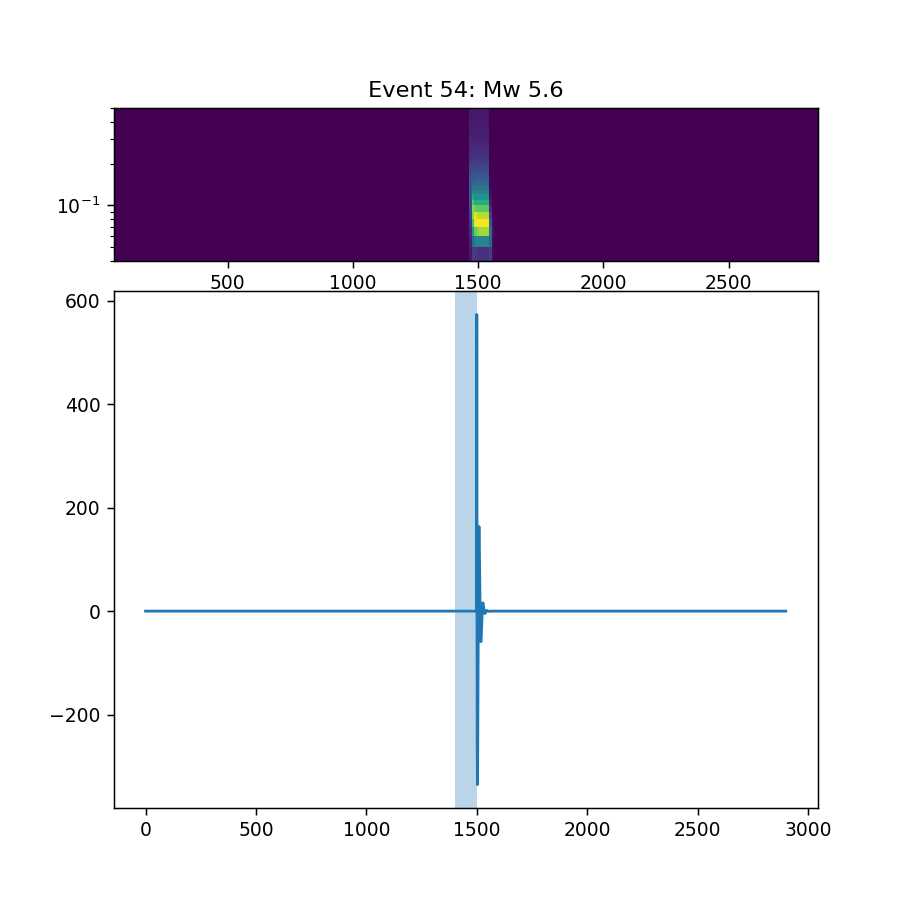

/staff/quentin/miniconda2/envs/seismonpy/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/staff/quentin/miniconda2/envs/seismonpy/lib/python3.7/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (0.5) of bandpass is at or above Nyquist (0.5). Applying a high-pass instead.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


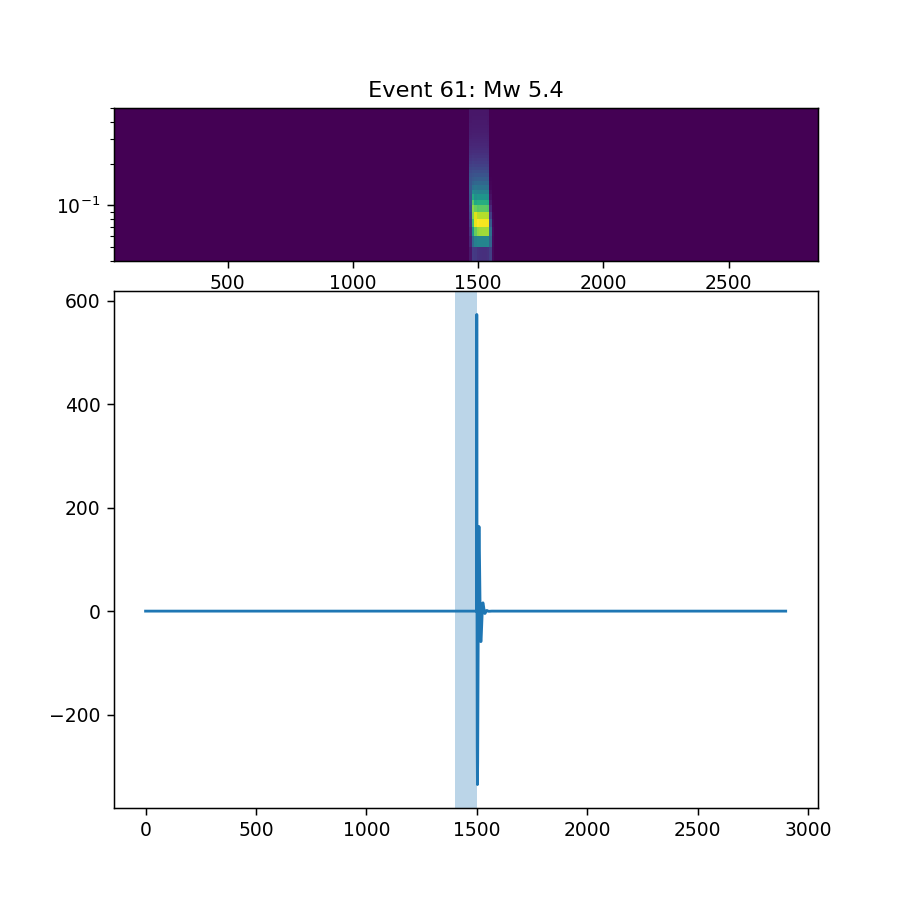

/staff/quentin/miniconda2/envs/seismonpy/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/staff/quentin/miniconda2/envs/seismonpy/lib/python3.7/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (0.5) of bandpass is at or above Nyquist (0.5). Applying a high-pass instead.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


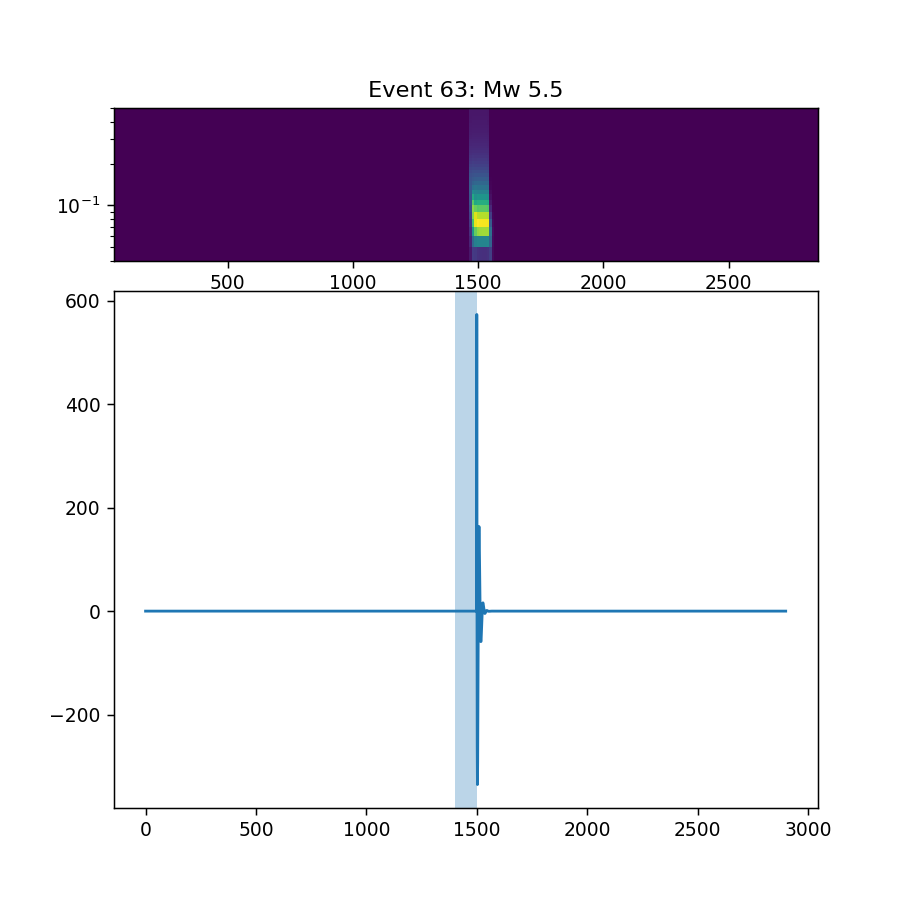

/staff/quentin/miniconda2/envs/seismonpy/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/staff/quentin/miniconda2/envs/seismonpy/lib/python3.7/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (0.5) of bandpass is at or above Nyquist (0.5). Applying a high-pass instead.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


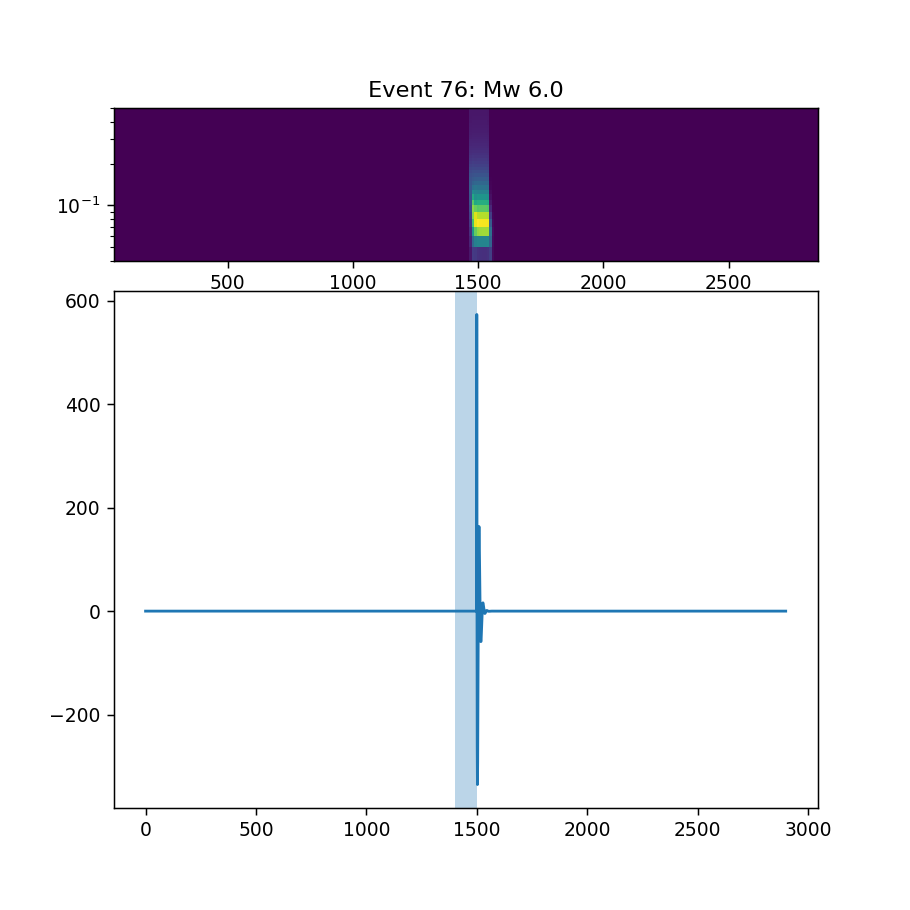

/staff/quentin/miniconda2/envs/seismonpy/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


In [176]:
import scipy
def create_trace(time, pressure, freqmin, freqmax, time_aliasing):
    tr = obspy.Trace()
    tr.data = pressure
    tr.delta = time[1]-time[0]
    tr.detrend()
    tr.filter('bandpass', freqmin=freqmin, freqmax=freqmax)
    tr.trim(starttime=tr.stats.starttime+time_aliasing, endtime=tr.stats.endtime-time_aliasing)
    return tr


freqmin, freqmax = 6e-2, 0.5
only_look_at = []
for ii, ievent in enumerate(keep_events):
    
    if only_look_at and not ievent in only_look_at:
        continue
    
    event = catalog[ievent]
    ids = keep_events[ievent]
    starttime, endtime = time[ids[1]], time[ids[0]]
    lat_balloon, lon_balloon = lat[ids[0]], lon[ids[0]]
    istarttime_pressure = np.argmin(abs(time_pressure-starttime))
    iendtime_pressure =  np.argmin(abs(time_pressure-endtime)) 
    
    ioffset_begin = 1500
    ioffset_end = 1400
    ioffset_aliasing = 200
    inds = np.arange(istarttime_pressure-ioffset_begin-ioffset_aliasing, iendtime_pressure+ioffset_end+ioffset_aliasing)
    time_aliasing = time_pressure[ioffset_aliasing]-time_pressure[0]
    tr = create_trace(time_pressure[inds], pressure[inds], freqmin, freqmax, time_aliasing)
    
    fig = plt.figure(figsize=(5,5))
    grid = fig.add_gridspec(4, 1)
    
    ax = fig.add_subplot(grid[:1, 0])
    #f, t, spectro = scipy.signal.stft(tr.data, fs=1./tr.stats.delta, nperseg=90, nfft=100, boundary='zeros')
    f, t, spectro = scipy.signal.spectrogram(tr.data, 1./tr.stats.delta, nperseg=90, noverlap=80, nfft=100)
    ax.pcolormesh(t,f,spectro)
    ax.set_yscale('log')
    ax.set_ylim([freqmin-0.02, freqmax])
    ax.set_title(f'Event {ievent}: Mw {event.magnitudes[0].mag}')
    
    
    ax = fig.add_subplot(grid[1:, 0])
    ax.plot(tr.times(), tr.data)
    ax.axvspan(tr.times()[ioffset_begin], tr.times()[ioffset_end], alpha=0.3)
    
    #if ii == 10:
    #    break

In [126]:
def get_time_range_for_seismic(inventory, event, vel=[4, 8]):
    
    time_range_seismic = {}
    dists = {}
    for net in inventory:
        for station in net:
            
            lon, lat = station.longitude, station.latitude
            wgs84_geod = Geod(ellps='WGS84')
            time_source = event.origins[0].time
            lon_source, lat_source = event.origins[0].longitude, event.origins[0].latitude
            _, _, dist = wgs84_geod.inv(lon_source, lat_source, lon, lat)
            dists[station.code] = dist/1e3
            time_range_seismic[station.code] = [(1./vel[1])*dist/1e3, (1./vel[0])*dist/1e3]
            
    return dists, time_range_seismic
        
starttime = UTCDateTime(dataset_location.date_start) - time[0] + time[ids[1]]
inventory = client.get_stations(network="*", station="*", latitude=lat_balloon, longitude=lon_balloon, maxradius=8., starttime=starttime, endtime=starttime+3600.)
print(inventory)
dists, time_range_seismic = get_time_range_for_seismic(inventory, event)
print(dists)
print(time_range_seismic)

Inventory created at 2023-11-08T00:32:48.985800Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2021-12-14...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (5):
			GE, IU, MY, SY, TW
		Stations (13):
			GE.TOLI (GEOFON Station Tolitoli, Sulawesi, Indonesia)
			IU.DAV (Davao, Philippines)
			MY.KDM (Kudat)
			MY.KKM (Kota Kinabalu)
			MY.LDM (Lahad Datu)
			MY.SDM (Sandakan)
			MY.TSM (Tawau)
			SY.DAV (DAV synthetic)
			SY.KKM (KKM synthetic)
			SY.LDM (LDM synthetic)
			SY.TGY (TGY synthetic)
			SY.TOLI (TOLI synthetic)
			TW.VNAS (Nansha Is.)
		Channels (0):

{'TOLI': 946.4327101748781, 'DAV': 1653.3931156166518, 'KDM': 1673.1388718984008, 'KKM': 1607.3749652292404, 'LDM': 1435.3646193592135, 'SDM': 1526.7530621625433, 'TSM': 1361.4242972969625, 'TGY': 2377.474569229079, 'VNAS': 2128.1177779101963}
{'TOLI': [118.30408877185977, 236.60817754371953], 'DAV': [206.67413945208148, 413.3482789

In [127]:
for net in inventory:
    for station in net:
        starttime = event.origins[0].time + time_range_seismic[station.code][0] -1000
        endtime = event.origins[0].time + time_range_seismic[station.code][1] + 1400.
        print(f'{station.code}: {starttime} to {endtime}')
        try:
            st = client.get_waveforms(net.code, station.code, "*", "*", starttime, endtime)
            break
        except:
            pass

TOLI: 2021-12-14T03:32:20.830089Z to 2021-12-14T04:14:19.134178Z
DAV: 2021-12-14T03:33:49.200139Z to 2021-12-14T04:17:15.874279Z
KDM: 2021-12-14T03:33:51.668359Z to 2021-12-14T04:17:20.810718Z
KKM: 2021-12-14T03:33:43.447871Z to 2021-12-14T04:17:04.369741Z
DAV: 2021-12-14T03:33:49.200139Z to 2021-12-14T04:17:15.874279Z
VNAS: 2021-12-14T03:34:48.540722Z to 2021-12-14T04:19:14.555444Z


/staff/quentin/miniconda2/envs/seismonpy/lib/python3.7/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (0.5) of bandpass is at or above Nyquist (0.25). Applying a high-pass instead.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


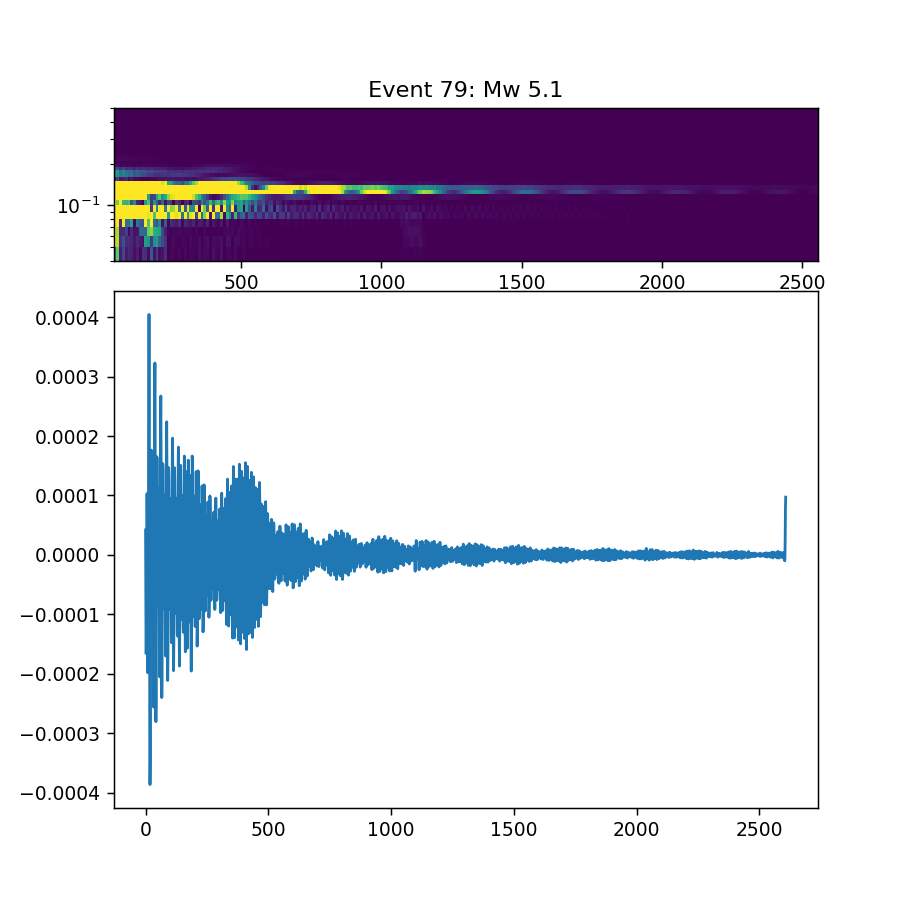

/staff/quentin/miniconda2/envs/seismonpy/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


In [128]:
tr = st[0].copy()
tr.filter('bandpass', freqmin=freqmin, freqmax=freqmax)
tr.resample(1.)

fig = plt.figure(figsize=(5,5))
grid = fig.add_gridspec(4, 1)

ax = fig.add_subplot(grid[:1, 0])
f, t, spectro = scipy.signal.spectrogram(tr.data, 1./tr.stats.delta, nperseg=90, noverlap=80, nfft=100)
ax.pcolormesh(t,f,spectro, vmax=np.quantile(spectro, q=0.98))
ax.set_title(f'Event {ievent}: Mw {event.magnitudes[0].mag}')
ax.set_yscale('log')
ax.set_ylim([freqmin-0.02, freqmax])

ax = fig.add_subplot(grid[1:, 0])
plt.plot(tr.times(), tr.data)

In [139]:
file = './2016.157.02.00.00.ULDB.EDF1.SAC'
tr = obspy.read(file)
tr

1 Trace(s) in Stream:
.ULDB..EDF1 | 2016-06-05T02:00:00.000000Z - 2016-06-05T03:00:00.000000Z | 200.0 Hz, 720001 samples

<IPython.core.display.Javascript object>


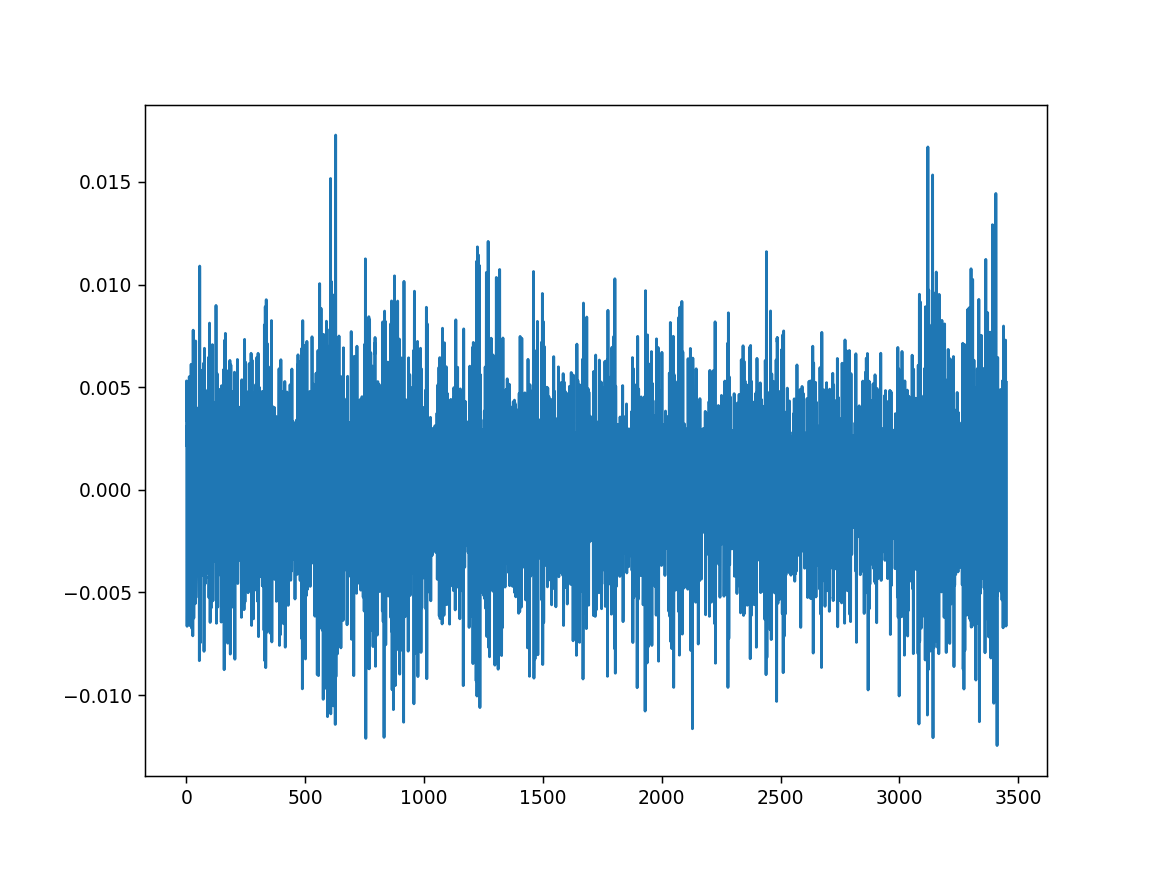

In [144]:
tr_c = tr[0].copy()
tr_c.filter('bandpass', freqmin=5e-2, freqmax=1.)
tr_c.trim(starttime=tr_c.stats.starttime+150.,)
plt.figure()
plt.plot(tr_c.times(), tr_c.data)

In [148]:
file = './gps.txt'
gps = pd.read_csv(file, header=[0], skiprows=1, delim_whitespace=True)
gps.columns = ['date', 'time', 'latitude', 'longitude', 'altitude', 'north_vel', 'east_vel', 'ascent_rate']
gps

,date,time,latitude,longitude,altitude,north_vel,east_vel,ascent_rate
0,05/16/2016,16:29:47,-44.723416,169.244829,1184.403972,0.0,0.0,0.0
1,05/16/2016,16:44:38,-44.723416,169.244829,1181.900689,0.0,0.0,0.0
2,05/16/2016,16:45:18,-44.723416,169.244829,1180.608037,0.0,0.0,0.0
3,05/16/2016,16:59:38,-44.723302,169.244829,1187.796364,0.0,0.0,0.0
4,05/16/2016,17:11:13,-44.723245,169.244829,1178.350817,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
7311,07/06/2016,00:24:26,-16.291307,-72.855009,4973.692220,0.0,0.0,0.0
7312,07/06/2016,00:38:50,-16.291307,-72.855009,4977.629231,0.0,0.0,0.0
7313,07/06/2016,00:53:57,-16.291307,-72.855009,4978.351016,0.0,0.0,0.0
7314,07/06/2016,01:08:40,-16.291307,-72.855009,4977.301147,0.0,0.0,0.0


In [177]:
from obspy.clients.fdsn import Client
client = Client("IRIS")
offset = 3.5
offset_time = 1000.
gps_c = gps.copy()
gps_c['date'] = gps_c['date'].str.split('/')
gps_c['date'] = gps_c['date'].str[-1] + '-' + gps_c['date'].str[0] + '-' + gps_c['date'].str[1]
gps_c['timestamp'] = gps_c['date'] + 'T' + gps_c['time']
print(gps_c['timestamp'])
opt_catalog = dict(
    starttime = UTCDateTime(gps_c['timestamp'].iloc[0])-offset_time,
    endtime = UTCDateTime(gps_c['timestamp'].iloc[-1])-offset_time,
    maxlongitude = min(np.nanmax(gps.longitude.values)+offset, 180.),
    maxlatitude = min(np.nanmax(gps.latitude.values)+offset, 90.),
    minlongitude = max(np.nanmin(gps.longitude.values)-offset, -180.),
    minlatitude = max(np.nanmin(gps.latitude.values)-offset, -90.),
    minmagnitude=6, 
    maxdepth=100.,
)
print(opt_catalog)
    
catalog = client.get_events(**opt_catalog)
print(catalog)

0       2016-05-16T16:29:47
1       2016-05-16T16:44:38
2       2016-05-16T16:45:18
3       2016-05-16T16:59:38
4       2016-05-16T17:11:13
               ...         
7311    2016-07-06T00:24:26
7312    2016-07-06T00:38:50
7313    2016-07-06T00:53:57
7314    2016-07-06T01:08:40
7315    2016-07-06T01:23:47
Name: timestamp, Length: 7316, dtype: object
{'starttime': UTCDateTime(2016, 5, 16, 16, 13, 7), 'endtime': UTCDateTime(2016, 7, 6, 1, 7, 7), 'maxlongitude': 180.0, 'maxlatitude': -2.1568113721, 'minlongitude': -180.0, 'minlatitude': -60.32330908058, 'minmagnitude': 6, 'maxdepth': 100.0}
8 Event(s) in Catalog:
2016-06-30T11:30:33.050000Z | -16.056, +167.470 | 6.0  mww
2016-06-20T03:50:55.240000Z | -20.207, +168.760 | 6.0  mww
2016-06-19T09:47:23.600000Z | -20.279, +169.074 | 6.3  mww
2016-06-10T04:17:44.840000Z |  -8.676, +160.559 | 6.2  mww
2016-06-09T04:13:08.130000Z | -11.249, +116.267 | 6.1  Mww
2016-06-06T02:35:32.390000Z | -30.023, -177.836 | 6.1  mww
2016-05-28T09:46:59.780000Z

<IPython.core.display.Javascript object>


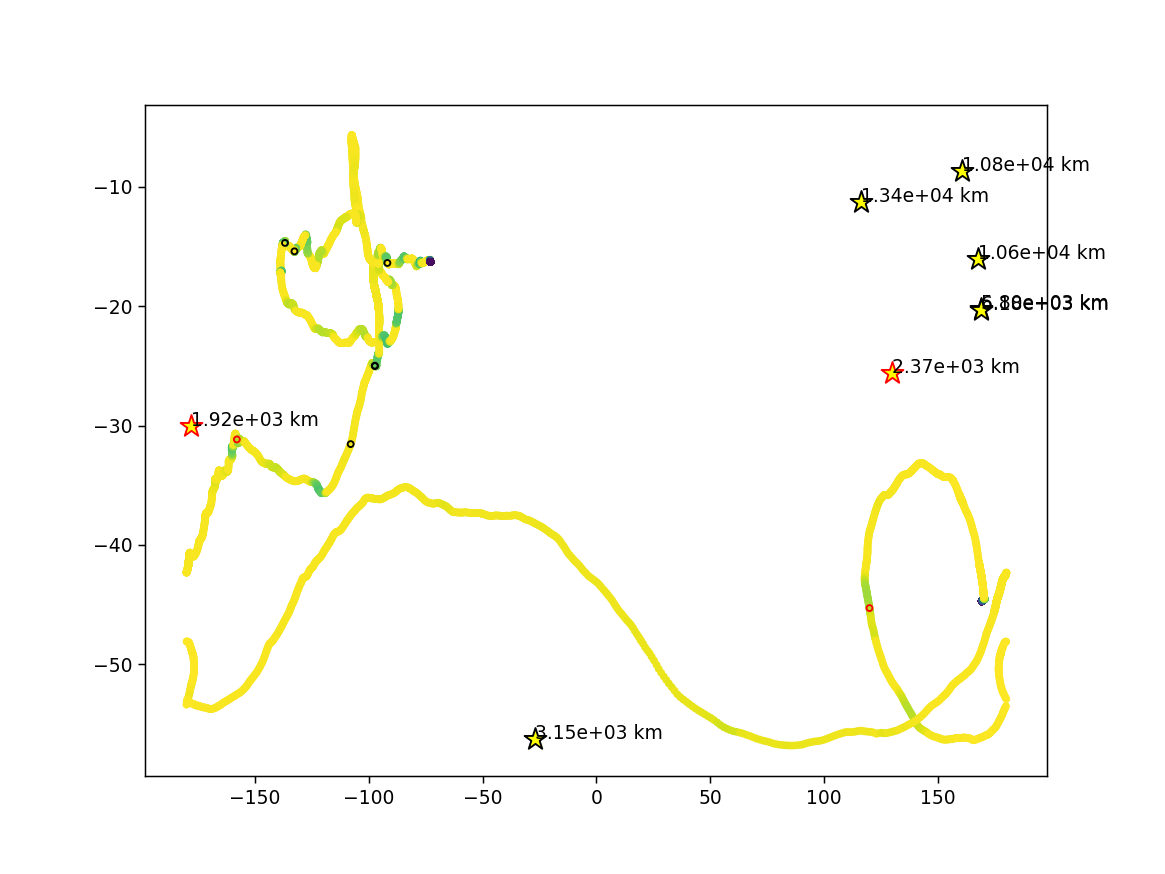

100%|██████████| 8/8 [00:00<00:00, 26.09it/s]


In [178]:
time = [UTCDateTime(t) for t in gps_c['timestamp'].values]
time = np.array([t-time[0] for t in time])
lon, lat, alt = gps_c.longitude.values, gps_c.latitude.values, gps_c.altitude.values
starttime = UTCDateTime(gps_c['timestamp'].iloc[0])

threshold_distance = 3e3
s_balloon = 10.
plt.figure()
plt.scatter(lon, lat, c=alt, s=s_balloon)

keep_events = {}
for ievent, event in tqdm(enumerate(catalog), total=len(catalog)):
    ids, lat_source, lon_source, dists = compute_estimated_arrival_time(starttime, time, lon, lat, alt, event)
    
    if (dists[ids[0]] <= threshold_distance) or (dists[ids[1]] <= threshold_distance):
        keep_events[ievent] = ids
        plt.scatter(lon[ids[1]:ids[0]], lat[ids[1]:ids[0]], facecolors='none', edgecolors='red', s=s_balloon)
        plt.scatter(lon_source, lat_source, marker='*', s=150., color='yellow', edgecolor='red')
    
    else:
        plt.scatter(lon[ids[1]:ids[0]], lat[ids[1]:ids[0]], facecolors='none', edgecolors='black', s=s_balloon)
        plt.scatter(lon_source, lat_source, marker='*', s=150., color='yellow', edgecolor='black')
    
    plt.text(lon_source, lat_source, f'{dists[ids[0]]:.2e} km', ha='left',)

In [192]:
print(time)
print([UTCDateTime(t) for t in gps_c['timestamp'].values])
gps_c

[0.000000e+00 8.910000e+02 9.310000e+02 ... 4.350250e+06 4.351133e+06
 4.352040e+06]
[UTCDateTime(2016, 5, 16, 16, 29, 47), UTCDateTime(2016, 5, 16, 16, 44, 38), UTCDateTime(2016, 5, 16, 16, 45, 18), UTCDateTime(2016, 5, 16, 16, 59, 38), UTCDateTime(2016, 5, 16, 17, 11, 13), UTCDateTime(2016, 5, 16, 17, 26, 17), UTCDateTime(2016, 5, 16, 17, 42, 11), UTCDateTime(2016, 5, 16, 17, 43, 51), UTCDateTime(2016, 5, 16, 17, 45, 47), UTCDateTime(2016, 5, 16, 17, 46, 42), UTCDateTime(2016, 5, 16, 17, 47, 57), UTCDateTime(2016, 5, 16, 17, 48, 52), UTCDateTime(2016, 5, 16, 17, 50, 9), UTCDateTime(2016, 5, 16, 17, 51, 4), UTCDateTime(2016, 5, 16, 17, 52, 20), UTCDateTime(2016, 5, 16, 17, 54, 22), UTCDateTime(2016, 5, 16, 17, 55, 43), UTCDateTime(2016, 5, 16, 17, 56, 38), UTCDateTime(2016, 5, 16, 17, 58, 7), UTCDateTime(2016, 5, 16, 17, 59, 3), UTCDateTime(2016, 5, 16, 18, 0, 10), UTCDateTime(2016, 5, 16, 18, 1, 6), UTCDateTime(2016, 5, 16, 18, 3, 8), UTCDateTime(2016, 5, 16, 18, 4, 23), UTCDateTime(

,date,time,latitude,longitude,altitude,north_vel,east_vel,ascent_rate,timestamp
0,2016-05-16,16:29:47,-44.723416,169.244829,1184.403972,0.0,0.0,0.0,2016-05-16T16:29:47
1,2016-05-16,16:44:38,-44.723416,169.244829,1181.900689,0.0,0.0,0.0,2016-05-16T16:44:38
2,2016-05-16,16:45:18,-44.723416,169.244829,1180.608037,0.0,0.0,0.0,2016-05-16T16:45:18
3,2016-05-16,16:59:38,-44.723302,169.244829,1187.796364,0.0,0.0,0.0,2016-05-16T16:59:38
4,2016-05-16,17:11:13,-44.723245,169.244829,1178.350817,0.0,0.0,0.0,2016-05-16T17:11:13
...,...,...,...,...,...,...,...,...,...
7311,2016-07-06,00:24:26,-16.291307,-72.855009,4973.692220,0.0,0.0,0.0,2016-07-06T00:24:26
7312,2016-07-06,00:38:50,-16.291307,-72.855009,4977.629231,0.0,0.0,0.0,2016-07-06T00:38:50
7313,2016-07-06,00:53:57,-16.291307,-72.855009,4978.351016,0.0,0.0,0.0,2016-07-06T00:53:57
7314,2016-07-06,01:08:40,-16.291307,-72.855009,4977.301147,0.0,0.0,0.0,2016-07-06T01:08:40


In [182]:
starttime = UTCDateTime(gps_c['timestamp'].iloc[0])
for ievent in keep_events:
    print(starttime + time[keep_events[ievent][0]])

2016-06-06T02:51:55.000000Z
2016-05-20T18:33:12.000000Z


In [195]:
33*60+12

1992

In [193]:
file = './2016.141.18.00.00.ULDB.EDF1.SAC'
tr = obspy.read(file)
tr

1 Trace(s) in Stream:
.ULDB..EDF1 | 2016-05-20T18:00:00.000000Z - 2016-05-20T19:00:00.000000Z | 200.0 Hz, 720001 samples

<IPython.core.display.Javascript object>


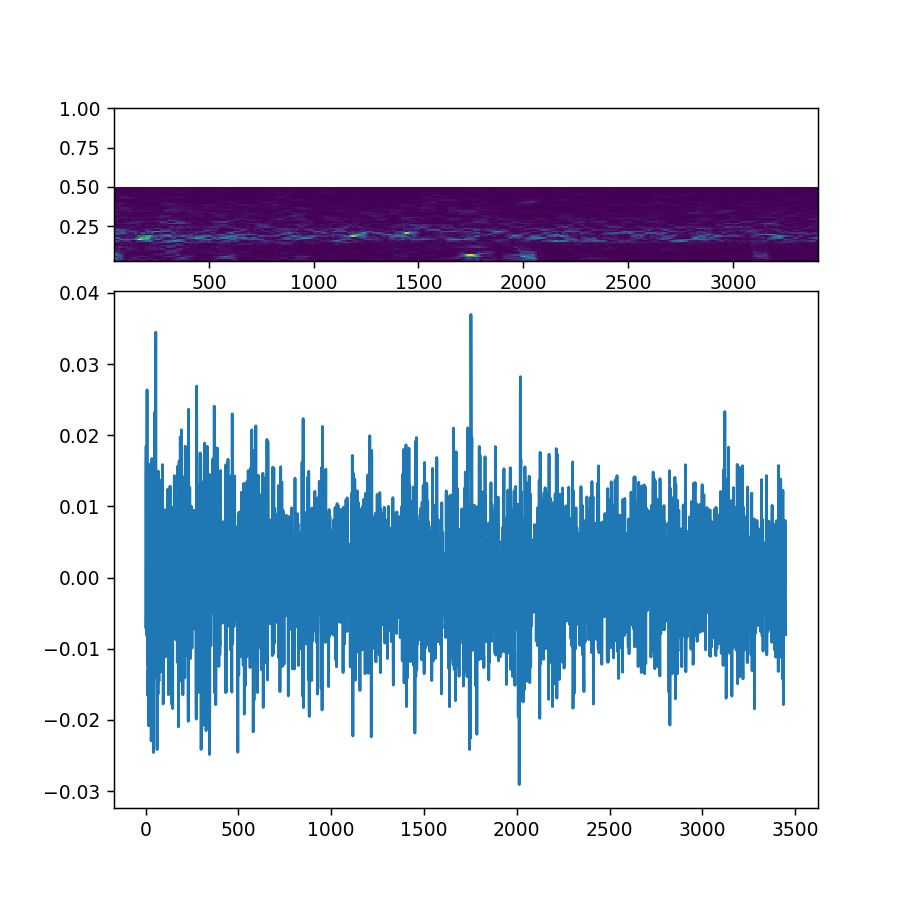

/staff/quentin/miniconda2/envs/seismonpy/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


In [202]:
tr_c = tr[0].copy()
tr_c.filter('bandpass', freqmin=3e-2, freqmax=0.5)
tr_c.trim(starttime=tr_c.stats.starttime+150.,)
tr_c.resample(1.)
#plt.figure()
#plt.plot(tr_c.times(), tr_c.data)

fig = plt.figure(figsize=(5,5))
grid = fig.add_gridspec(4, 1)

ax = fig.add_subplot(grid[:1, 0])
#f, t, spectro = scipy.signal.stft(tr.data, fs=1./tr.stats.delta, nperseg=90, nfft=100, boundary='zeros')
f, t, spectro = scipy.signal.spectrogram(tr_c.data, 1./tr_c.stats.delta, nperseg=90, noverlap=80, nfft=100)
ax.pcolormesh(t,f,spectro)
#ax.set_yscale('log')
ax.set_ylim([3e-2, 1.])
#ax.set_title(f'Event {ievent}: Mw {event.magnitudes[0].mag}')

ax = fig.add_subplot(grid[1:, 0])
ax.plot(tr_c.times(), tr_c.data)
#ax.axvspan(tr.times()[ioffset_begin], tr.times()[ioffset_end], alpha=0.3)

## Loon data investigation
Loon data were unfortunately post-processed and returned with a sampling rate generally above 1 minutes 

In [2]:
file = './loon-flights-2011-2014.nc'
file = './loon-flights-2021Q2.nc'
dataset_loon = nc.Dataset(file)

In [3]:
dataset_loon

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): time(826541)
    variables(dimensions): float64 time(time), <class 'str'> flight_id(time), float32 latitude(time), float32 longitude(time), uint16 altitude(time), uint8 temperature(time), uint16 pressure(time), uint16 earth_ir(time), int8 earth_ir_sensor_config(time), int8 acs(time), int8 propeller_on(time), int32 velocity_u(time), int32 velocity_v(time), int16 omega(time), uint16 acceleration(time), float64 solar_elevation(time), float64 solar_azimuth(time), int8 is_daytime(time)
    groups: 

In [4]:
flight_ids = dataset_loon.variables['flight_id'][:]

In [5]:
nb_flights_to_process = 100

flight_ids_processed = {}
current_id = 0
for i in range(nb_flights_to_process):
    if current_id >= flight_ids.size:
        break
    flight_id = flight_ids[current_id]
    flight_ids_processed[flight_id] = np.where(flight_ids==flight_id)[0]
    current_id += flight_ids_processed[flight_id].max()+1

In [6]:
[f'{flight}: {flight_ids_processed[flight].size} elements sampled at {(dataset_loon.variables["time"][flight_ids_processed[flight]][1]-dataset_loon.variables["time"][flight_ids_processed[flight]][0])/1e3} s' for flight in flight_ids_processed]

/staff/quentin/miniconda2/envs/seismonpy/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


['LN-191: 68997 elements sampled at 60.0 s',
 'LN-206: 86027 elements sampled at 34.0 s',
 'LN-295: 26360 elements sampled at 50.0 s',
 'LN-310: 67774 elements sampled at 60.0 s']

/staff/quentin/miniconda2/envs/seismonpy/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/staff/quentin/miniconda2/envs/seismonpy/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


<IPython.core.display.Javascript object>


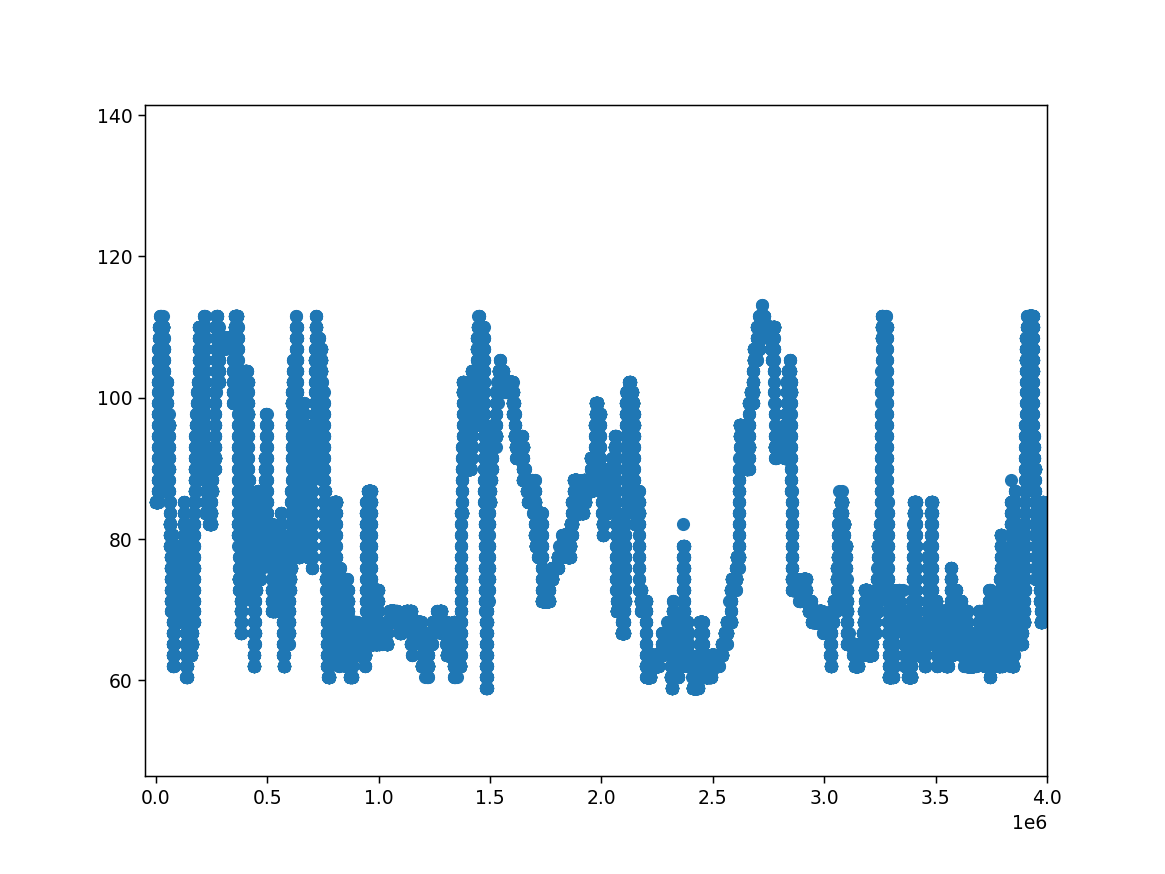

In [19]:
times = dataset_loon.variables['time'][flight_ids_processed['LN-206']]/1e3
pressure = dataset_loon.variables['pressure'][flight_ids_processed['LN-206']]

#print(np.diff(times).min(), UTCDateTime(times[0]), UTCDateTime(times[-1]))
plt.figure()
plt.scatter(times-times[0], pressure)

In [16]:
np.diff(times)[1302]

61.0

In [ ]:
UTCDateTime(dataset_loon.variables['time'][:][0]/1e3)